In [12]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [13]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [14]:
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 19.0144, 14.6042, 40.7143, 47.6062, 32.7668, 25.0478]
The temperature information received is: [5.84, 3.89, -1.76, 8.05, 25, 28.65, 0.71, 8.59, 19.95, 20.16]


In [18]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,5.84
1,London,51.5085,3.89
2,Oslo,59.9127,-1.76
3,Beijing,39.9075,8.05
4,Mumbai,19.0144,25.00
5,Manila,14.6042,28.65
6,New York,40.7143,0.71
7,Seattle,47.6062,8.59
8,Dallas,32.7668,19.95
9,Taipei,25.0478,20.16


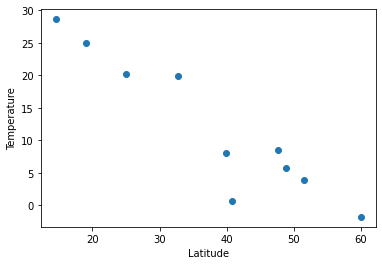

In [19]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data["lat"]
y_values = weather_data["temp"]
plt.scatter(x_values,y_values,marker="o")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [20]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)

# Get regression values
regress_values = x_values*slope+intercept
print(regress_values)

0     4.624067
1     2.843230
2    -2.793662
3    10.624290
4    24.637776
5    27.595799
6    10.083150
7     5.460593
8    15.413722
9    20.591035
Name: lat, dtype: float64


In [21]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.67x +37.39


r-vallue is = 0.8609604509886478


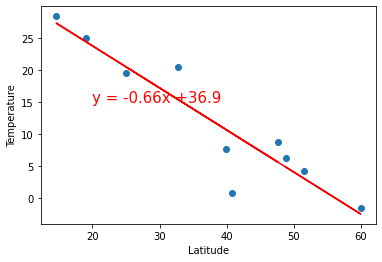

In [11]:
# Create Plot
plt.scatter(x_values,y_values,marker="o")
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f'r-vallue is = {rvalue**2}')

# Show plot
plt.show()

In [23]:
# Calculate the temperature for Florence at 43.77 degrees
florence_lat = 43.77
florence_predicted_temp = round(florence_lat*slope+intercept,2)
                                
print(f"The Predicted temperature for Florence will be {florence_predicted_temp}.")

The Predicted temperature for Florence will be 8.03.


In [26]:
# Use API to determine actual temperature
response = requests.get(query_url+'Florence').json()
florence_actual_temp = response['main']['temp']

print(f"The actual temperature of Florence is {florence_actual_temp}")

The actual temperature of Florence is 8.72
